In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/supply_chain_demand_correlated.csv')

In [2]:
df.head()


,Date,Product_ID,Location_ID,Historic_Demand,Forward_Consumption,Backward_Consumption,On_Hand_Inventory,Lead_Time,Price,Seasonality_Index,Demand
0,2022-01-01,P004,L004,474.0,480.616467,340.627759,750.876512,10,28.034736,1.103404,646.0
1,2022-01-02,P005,L004,404.0,397.161239,357.850945,764.813979,6,35.008159,1.306778,519.0
2,2022-01-03,P003,L004,459.0,466.089708,414.753370,734.512714,13,36.967273,0.656917,284.0 units
3,2022-01-04,P005,L004,416.0,377.273571,266.658656,630.902472,5,33.552746,0.515023,231.0
4,2022-01-05,P005,L004,222.0,194.489671,178.830276,479.901548,8,32.146704,0.812713,190.0


In [3]:
print(df.isnull().sum())

Date                     0
Product_ID               0
Location_ID              0
Historic_Demand         50
Forward_Consumption     50
Backward_Consumption     0
On_Hand_Inventory       50
Lead_Time                0
Price                    0
Seasonality_Index        0
Demand                  46
dtype: int64


In [4]:
print(df.isnull())

      Date  Product_ID  Location_ID  Historic_Demand  Forward_Consumption  \
0    False       False        False            False                False   
1    False       False        False            False                False   
2    False       False        False            False                False   
3    False       False        False            False                False   
4    False       False        False            False                False   
..     ...         ...          ...              ...                  ...   
995  False       False        False            False                False   
996  False       False        False            False                False   
997  False       False        False            False                False   
998  False       False        False            False                False   
999  False       False        False            False                False   

     Backward_Consumption  On_Hand_Inventory  Lead_Time  Price  \
0        

In [5]:
df.dropna()

,Date,Product_ID,Location_ID,Historic_Demand,Forward_Consumption,Backward_Consumption,On_Hand_Inventory,Lead_Time,Price,Seasonality_Index,Demand
0,2022-01-01,P004,L004,474.0,480.616467,340.627759,750.876512,10,28.034736,1.103404,646.0
1,2022-01-02,P005,L004,404.0,397.161239,357.850945,764.813979,6,35.008159,1.306778,519.0
2,2022-01-03,P003,L004,459.0,466.089708,414.753370,734.512714,13,36.967273,0.656917,284.0 units
3,2022-01-04,P005,L004,416.0,377.273571,266.658656,630.902472,5,33.552746,0.515023,231.0
4,2022-01-05,P005,L004,222.0,194.489671,178.830276,479.901548,8,32.146704,0.812713,190.0
...,...,...,...,...,...,...,...,...,...,...,...
993,2024-09-20,P002,L002,404.0,309.839123,330.707700,748.066548,10,38.047603,1.287931,472.0
995,2024-09-22,P002,L002,465.0,434.081737,308.801962,962.064300,5,33.179839,1.148032,567.0
996,2024-09-23,P001,L002,310.0,335.075501,207.196114,701.274122,12,25.889620,0.838750,343.0
998,2024-09-25,P004,L002,208.0,167.675135,187.805944,383.104601,14,27.152751,1.357917,356.0


In [32]:
# Removing rows with errors or converting erroneous values
df = df[pd.to_numeric(df['Historic_Demand'], errors='coerce').notna()]

df['Historic_Demand'] = pd.to_numeric(df['Historic_Demand'])

df = df[pd.to_numeric(df['Forward_Consumption'], errors='coerce').notna()]
df['Forward_Consumption'] = pd.to_numeric(df['Forward_Consumption'])


0      1.496993
1      0.886180
2      1.366105
3      0.990891
4     -0.701935
         ...   
993    0.886180
995    1.418460
996    0.065944
998   -0.824098
999   -1.112053
Name: Historic_Demand, Length: 820, dtype: float64


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


scaler_values={}

columns=['Historic_Demand','Forward_Consumption','Backward_Consumption','On_Hand_Inventory','Lead_Time','Price','Seasonality_Index']
Scaler=StandardScaler()
df[columns]=Scaler.fit_transform(df[columns])



In [8]:
df['Demand']=df['Demand'].replace(' units','',regex=True).astype(float)

In [10]:
from sklearn.preprocessing import LabelEncoder

columns=["Date","Product_ID","Location_ID"]
labelencoders={}

for cols in columns:
  le=LabelEncoder()
  df[cols]=le.fit_transform(df[cols])
  labelencoders[cols]=le



In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  901 non-null    int64  
 1   Product_ID            901 non-null    int64  
 2   Location_ID           901 non-null    int64  
 3   Historic_Demand       901 non-null    float64
 4   Forward_Consumption   901 non-null    float64
 5   Backward_Consumption  901 non-null    float64
 6   On_Hand_Inventory     857 non-null    float64
 7   Lead_Time             901 non-null    int64  
 8   Price                 901 non-null    float64
 9   Seasonality_Index     901 non-null    float64
 10  Demand                860 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 116.8 KB


In [33]:
df.dropna(inplace=True)
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  820 non-null    int64  
 1   Product_ID            820 non-null    int64  
 2   Location_ID           820 non-null    int64  
 3   Historic_Demand       820 non-null    float64
 4   Forward_Consumption   820 non-null    float64
 5   Backward_Consumption  820 non-null    float64
 6   On_Hand_Inventory     820 non-null    float64
 7   Lead_Time             820 non-null    float64
 8   Price                 820 non-null    float64
 9   Seasonality_Index     820 non-null    float64
 10  Demand                820 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 76.9 KB
Date                    0
Product_ID              0
Location_ID             0
Historic_Demand         0
Forward_Consumption     0
Backward_Consumption    0
On_Hand_Inventory       0
Lead

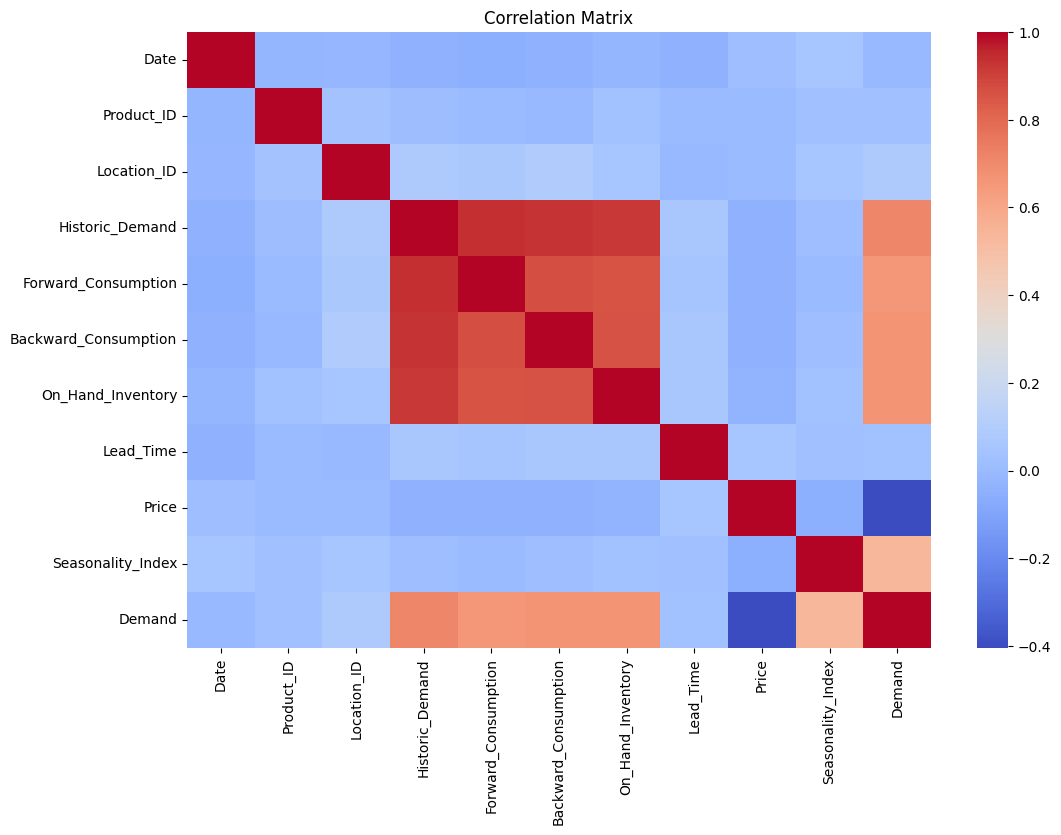

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df=df.select_dtypes(include=np.number)
corr=numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=False,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

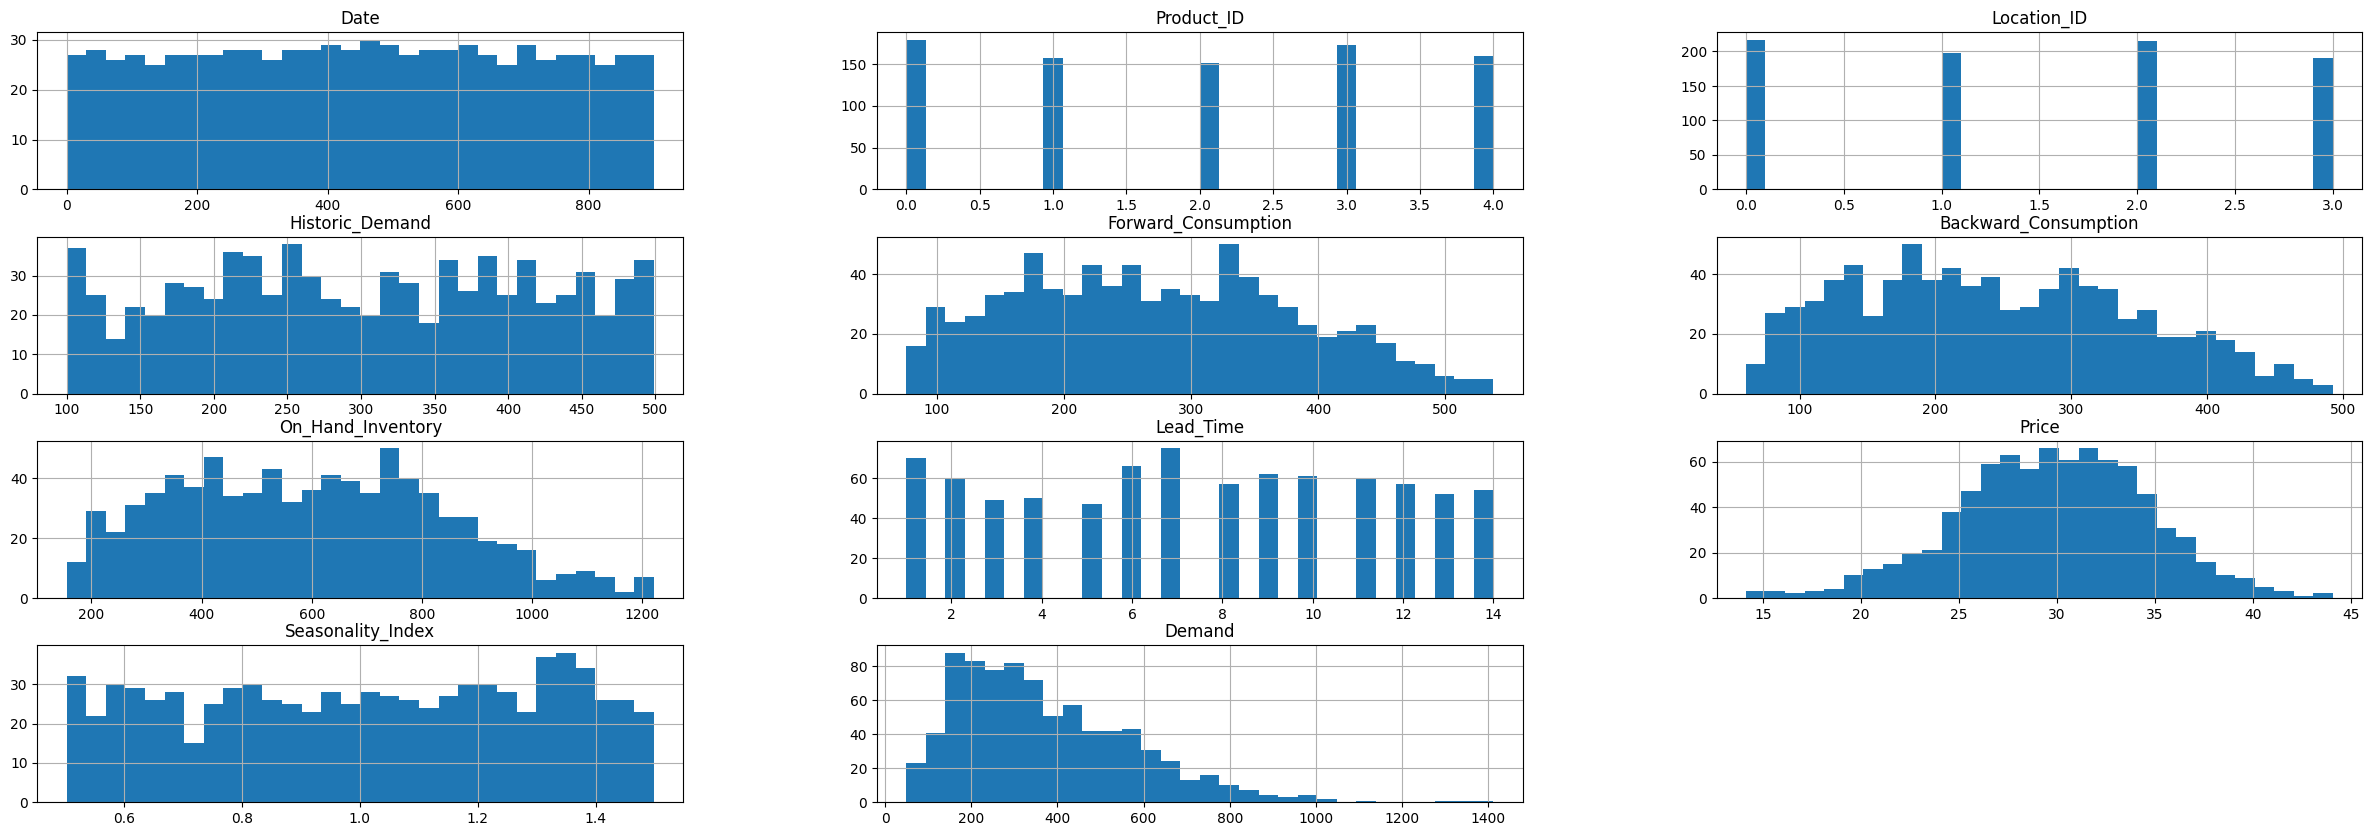

In [21]:
df.hist(bins=30, figsize=(30,10))
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X=df.drop(['Demand'], axis=1)
y=df['Demand']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    # Calculate RMSE without 'squared' argument
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("RMSE:", rmse)
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("R² Score:", r2_score(y_test, predictions))

for name, model in models.items():
    print(f"\n{name} Performance:")
    evaluate_model(model, X_test, y_test)


Linear Regression Performance:
RMSE: 64.32537278648594
MAE: 42.75758662103959
R² Score: 0.8963734032232532

Random Forest Performance:
RMSE: 35.14187710153674
MAE: 23.82030487804878
R² Score: 0.9690716662448177

Gradient Boosting Performance:
RMSE: 29.11034457510789
MAE: 18.903757363571977
R² Score: 0.9787772672887434
